# DEFCoN Tutorial - Prediction

This tutorial is a quick introduction to prediction with the Density Estimation Fully Convolutional Network (DEFCoN) for fluorescence spot counting in localization microscopy. This tutorial covers:

- Loading the pre-trained DEFCoN model

### Getting Help

If you have any questions, please ask in the DEFCoN Gitter chat room: https://gitter.im/leb_epfl/DEFCoN

### Additional Information

DEFCoN is part of a family of software packages for automating super-resolution microscopes from the [Laboratory of Experimental Biophysics](https://leb.epfl.ch/) at the École Polytechnique Fédérale de Lausanne (EPFL), Switzerland. The other packages include:

- [Automated Laser Illumination Control Algorithms (ALICA)](https://github.com/LEB-EPFL/ALICA)
- [SMLM Simulation Acquisition Software (SASS)](https://github.com/LEB-EPFL/SASS)

### Attribution

If you use DEFCoN in your own work, then please use the following citation.

> Ottino, B., Douglass, Kyle M., and Manley, S., "DEFCoN", https://github.com/kmdouglass/DEFCoN (2018)

A full citation will follow shortly.

# Preliminary Steps

Before running this tutorial, you should download the example datasets. These may be found at:

> Ottino, Baptiste, Douglass, Kyle M., & Manley, Suliana. (2018). Example datasets for DEFCoN (Version 2) [Data set]. Zenodo. http://doi.org/10.5281/zenodo.1207965

You may either do this manually, or run the code below to download the dataset directly to the same directory as this notebook.

In [1]:
import urllib.request as request
import zipfile
import os

url_root = 'https://zenodo.org/record/1207965/files/'
filename = 'DEFCoN_example_data.zip'
url = url_root + filename

# Download the zip file from Zenodo.
with request.urlopen(url) as host_file:
    with open(filename, 'wb') as client_file:
        client_file.write(host_file.read())
assert os.path.isfile(filename), 'Error: file {} does not exist.'.format(filename)

# Extract the contents of the file to the same directory as this notebook.
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('./')
    
# Delete the zip file
os.remove(filename)

example_dir = filename.split('.')[0]

# Load the trained DEFCoN network

To begin, we need to specify the location of the trained DEFCoN network.

In [2]:
# Obtain the filename for the saved DEFCoN model
import pkg_resources
defcon_model = pkg_resources.resource_filename('defcon.resources', 'defcon_tf13.h5')

Next, we load the network weights into a model that we can use for prediction. To do this, you must have the exact combination of Python 3.6, TensorFlow 1.3.0, and Keras 2.0.8 installed.

In [3]:
from defcon.networks import FCN
model = FCN.from_file(defcon_model)

/home/kmdouglass/miniconda3/envs/defcon36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Prediction

Now that we have loaded the DEFCoN model, we can apply it to the test data we downloaded in the preliminary section.

In [4]:
from pathlib import Path

# Predict from a TIF image stack
tif_file = str(Path(example_dir) / Path('data_2/generated_stack.tif'))
y_pred = model.predict_tiff(tif_file)

Visualizing the results:

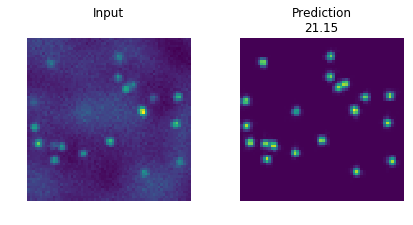

In [5]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt

frame_num = 900

pred = y_pred[frame_num, :, :, :].squeeze()

# Input files
imgs = tifffile.imread(tif_file)
    
fig, ax = plt.subplots(ncols=2, figsize=(7,3))
ax[0].imshow(imgs[frame_num, :, :])
ax[1].imshow(pred)

ax[0].set_title('Input\n')
ax[1].set_title('Prediction\n{:.2f}'.format(np.sum(pred)))

for a in ax:
    a.set_axis_off()
    
#plt.savefig('defcon_demo_2.png')
plt.show()